In [2]:
import networkx as nx 
import matplotlib.pyplot as plt
from random import randint

In [20]:
class Graph(object):

    def __init__(self, graph_dict=None):
        
        if graph_dict == None:
            graph_dict = {}
        self.__graph_dict = graph_dict

    def vertices(self):
        
        return list(self.__graph_dict.keys())

    def edges(self):
        
        return self.__generate_edges()

    def add_vertex(self, vertex):
        if vertex not in self.__graph_dict:
            self.__graph_dict[vertex] = []

    def add_edge(self, edge):
        
        edge = set(edge)
        (vertex1, vertex2) = tuple(edge)
        if vertex1 in self.__graph_dict:
            self.__graph_dict[vertex1].append(vertex2)
        else:
            self.__graph_dict[vertex1] = [vertex2]

    def __generate_edges(self):
        
        edges = []
        for vertex in self.__graph_dict:
            for neighbour in self.__graph_dict[vertex]:
                if {neighbour, vertex} not in edges:
                    edges.append({vertex, neighbour})
        return edges

    def find_all_paths(self, start_vertex, end_vertex, path=[]):
            
            graph = self.__graph_dict 
            path = path + [start_vertex]
            if start_vertex == end_vertex:
                return [path]
            if start_vertex not in graph:
                return []
            paths = []
            for vertex in graph[start_vertex]:
                if vertex not in path:
                    extended_paths = self.find_all_paths(vertex, 
                                                        end_vertex, 
                                                        path)
                    for p in extended_paths: 
                        paths.append(p)
            return paths
    def vertex_degree(self, vertex):
         
        adj_vertices =  self.__graph_dict[vertex]
        degree = len(adj_vertices) + adj_vertices.count(vertex)
        return degree

    def find_isolated_vertices(self):
        
        graph = self.__graph_dict
        isolated = []
        for vertex in graph:
            print(isolated, vertex)
            if not graph[vertex]:
                isolated += [vertex]
        return isolated

    def delta(self):
        
        min = 100000000
        for vertex in self.__graph_dict:
            vertex_degree = self.vertex_degree(vertex)
            if vertex_degree < min:
                min = vertex_degree
        return min
        
    def Delta(self):
        
        max = 0
        for vertex in self.__graph_dict:
            vertex_degree = self.vertex_degree(vertex)
            if vertex_degree > max:
                max = vertex_degree
        return max

    def density(self):
        
        g = self.__graph_dict
        V = len(g.keys())
        E = len(self.edges())
        return 2.0 * E / (V *(V - 1))

    def is_connected(self, 
                     vertices_encountered = None, 
                     start_vertex=None):
        
        if vertices_encountered is None:
            vertices_encountered = set()
        gdict = self.__graph_dict        
        vertices = list(gdict.keys()) # "list" necessary in Python 3 
        if not start_vertex:
            # chosse a vertex from graph as a starting point
            start_vertex = vertices[0]
        vertices_encountered.add(start_vertex)
        if len(vertices_encountered) != len(vertices):
            for vertex in gdict[start_vertex]:
                if vertex not in vertices_encountered:
                    if self.is_connected(vertices_encountered, vertex):
                        return True
        else:
            return True
        return False 

    def diameter(self):
        
        
        v = self.vertices() 
        pairs = [ (v[i],v[j]) for i in range(len(v)-1) for j in range(i+1, len(v))]
        smallest_paths = []
        for (s,e) in pairs:
            paths = self.find_all_paths(s,e)
            smallest = sorted(paths, key=len)[0]
            smallest_paths.append(smallest)

        smallest_paths.sort(key=len)

        # longest path is at the end of list, 
        # i.e. diameter corresponds to the length of this path
        diameter = len(smallest_paths[-1]) - 1
        return diameter

    def __str__(self):
        res = "vertices: "
        for k in self.__graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self.__generate_edges():
            res += str(edge) + " "
        return res

    def BFS(self, root):
        Q = []
        visited = {root}    
        Q.append(root)
        while len(Q)>0:
            v = Q.pop(0)
            print(v)
            for w in self.__graph_dict[v]:
                if not(w in visited):
                    visited = visited.union(w)
                    Q.append(w)

    def DFS(self, root):
        S = []
        visited = set()   
        S.append(root)
        while len(S)>0:
            v = S.pop()
            print(v)
            if not(v in visited):
                visited = visited.union(v)
                for w in self.__graph_dict[v]:
                    if not(w in visited):
                        S.append(w)                    
    def Articulation_Points_DFS(self, root):
        S = []
        visited = set()   
        artic = []
        info = {}
        S.append(root)
        time = 1
        while len(S)>0:
            v = S.pop()
            if not(v in visited):
                if(v == root): 
                    info[v] = [None,1,1]
                else:
                    time += 1 
                    info[v][1:] = [time,time]
                visited = visited.union(v)
                for w in self.__graph_dict[v]:
                    #print(info,v,w)
                    if not(w in visited):
                        info[w] = [v,1000,1000]
                        S.append(w)   
                    else: 
                        if((w != info[v][0]) and (v != w)):                          
                            k=v
                            s=w
                            info[k][2] = info[s][1]
                            s = k
                            k = info[k][0]
                            while(k != w):
                                info[k][2] = min(info[s][2],info[k][2] )
                                s = k
                                k = info[k][0]
                                          
        
        for v in info:
            if v != root:
                if info[v][2] >= info[info[v][0]][1] and info[v][0] != root:
                    
                    artic.append(info[v][0])
            else:
                fils = [k for k in info if info[k][0]== v] 
                if len(fils) > 1 : artic.append(v) 
                 
        return(list(set(artic)))         
               
    


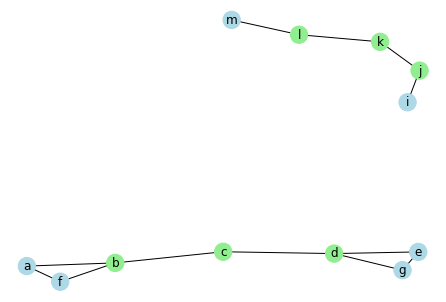

In [26]:
# g = { "a" : ["c","b","d"],
#         "b" : ["a","c","d"],
#         "c" : ["b", "d", "a"],
#         "d" : ["e", "c","b","a"],
#         "e" : ["f","d"],
#         "f" : ["g","h","e"],
#         "g" : ["f","h"],
#         "h" : ["f","g","i","k"],
#         "i" : ["j","h","k"],
#         "j" : ["i","k"],
#         "k" : ["i","j","h"]
#     }
# g = { "a" : ["b"],
#         "b" : ["a","c"],
#         "c" : ["b", "d"],
#         "d" : ["e", "c"],
#         "e" : ["f","d"],
#         "f" : ["g","e"],
#         "g" : ["f"],
#     }

g = {  "a" : ["b","f"],
        "b" : ["a","c","f"],
        "c" : ["b","d"],
        "d" : ["c","e","g"],
        "e" : ["d","g"],
        "f" : ["a","b"],
        "g" : ["d","e"]
     };g2 ={  "i" : ["j"],
        "j" : ["i","k"],
        "k" : ["j","l"],
        "l" : ["k","m"],
        "m" : ["l"]
}
G = nx.Graph()
for n in g:
  G.add_node(n)
  for e in g[n]:
    G.add_edge(n,e)
for n in g2:
  G.add_node(n)
  for e in g2[n]:
    G.add_edge(n,e)
graph = Graph(g)

graph2 = Graph(g2)
art = graph.Articulation_Points_DFS("a")
art += graph2.Articulation_Points_DFS("i")
color_map = []  
for n in G.nodes:
  if n in art: color_map.append('lightgreen') ;
  else:color_map.append('lightblue')
nx.draw(G,with_labels=1,node_color=color_map)

[['a', 'b', 'c', 'd', 'e'], ['a', 'f', 'b', 'c', 'd', 'e']]


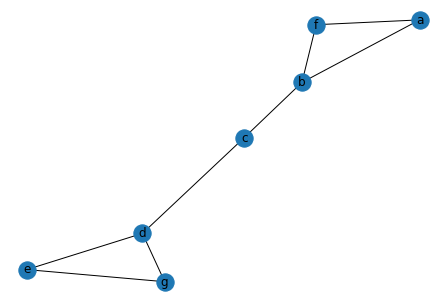

In [5]:
# g = {  "a" : ["b","e","d"],
#         "b" : ["a","c","e"],
#         "c" : ["b","d","e"],
#         "d" : ["c","e","a"],
#         "e" : ["a","d","b","c"]
# }
g = {  "a" : ["b","f"],
        "b" : ["a","c"],
        "c" : ["b","d"],
        "d" : ["c","e"],
        "e" : ["d","g"],
        "f" : ["a","b"],
        "g" : ["d","e"]
}
graph = Graph(g)

G = nx.Graph()
for n in g:
  G.add_node(n)
  for e in g[n]:
    G.add_edge(n,e)
    G[n][e]['weight'] = randint(1,10)

# for n in G.edges:
#   if n in art: color_map.append('lightgreen') ;
#   else:color_map.append('lightblue')


print(graph.find_all_paths("a","e"))
#print(graph.find_all_paths("a","a"))  
nx.draw(G,with_labels=1)